In [38]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 544.8 kB/s eta 0:00:0000:0100:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from datetime import datetime

In [15]:
from nba_api.stats.endpoints import leaguegamefinder
games = None
for ids in team_ids:
    if games is None:
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=ids)
        games = gamefinder.get_data_frames()[0]
    else:
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=ids)
        games = pd.concat([games, gamefinder.get_data_frames()[0]])

In [16]:
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

In [18]:
games= games[games['GAME_DATE'] < '2023-03-13']
games= games[games['GAME_DATE'] > '2023-03-05']

In [20]:
game_ids = games['GAME_ID'].unique().tolist()
game_ids

['0022201008',
 '0022200999',
 '0022200985',
 '0022200974',
 '0022200986',
 '0022200971',
 '0022201015',
 '0022201000',
 '0022200987',
 '0022201017',
 '0022201011',
 '0022200988',
 '0022200976',
 '0022201009',
 '0022200989',
 '0022201010',
 '0022200983',
 '0022201014',
 '0022201002',
 '0022200975',
 '0022201012',
 '0022200996',
 '0022200982',
 '0022200993',
 '0022200981',
 '0022201004',
 '0022200991',
 '0022201019',
 '0022201003',
 '0022200984',
 '0022201007',
 '0022200995',
 '0022200978',
 '0022201001',
 '0022200980',
 '0022200997',
 '0022200979',
 '0022200994',
 '0022201006',
 '0022200972',
 '0022201016',
 '0022200998',
 '0022201013',
 '0022200990',
 '0022200977',
 '0022201018',
 '0022201005',
 '0022200769',
 '0022200992']

In [30]:
from nba_api.stats.endpoints import boxscoreadvancedv2
boxscores_advanced_player = None
boxscores_advanced_team = None
for game_id in game_ids:
    if boxscores_advanced_team is None:
        gamefinder = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_id)
        boxscores_advanced_team = gamefinder.get_data_frames()[1]
        boxscores_advanced_player = gamefinder.get_data_frames()[0]
    else:
        gamefinder = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_id)
        boxscores_advanced_team = pd.concat([boxscores_advanced_team, gamefinder.get_data_frames()[1]])
        boxscores_advanced_player = pd.concat([boxscores_advanced_player, gamefinder.get_data_frames()[0]])

In [41]:
adv_team_part1 = pd.read_pickle('../data/pkl/boxscores_advanced_team_part1.pkl')
adv_player_part1 = pd.read_pickle('../data/pkl/boxscores_advanced_player_part1.pkl')
adv_team_part2 = pd.read_pickle('../data/pkl/boxscores_advanced_team_part2.pkl') 
adv_player_part2 = pd.read_pickle('../data/pkl/boxscores_advanced_player_part2.pkl')

adv_team = pd.concat([adv_team_part1, adv_team_part2, boxscores_advanced_team]).reset_index(drop=True)
adv_player = pd.concat([adv_player_part1, adv_player_part2, boxscores_advanced_player]).reset_index(drop=True)

In [43]:
adv_team.to_pickle('boxscores_advanced_team_all.pkl')
adv_player.to_pickle('boxscores_advanced_player_all.pkl')

In [4]:
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
team_names = [team['full_name'] for team in nba_teams]
team_names.sort()
team_ids = [team['id'] for team in nba_teams]

In [5]:
from nba_api.stats.endpoints import leaguegamefinder
games = None
for ids in team_ids:
    if games is None:
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=ids)
        games = gamefinder.get_data_frames()[0]
    else:
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=ids)
        games = pd.concat([games, gamefinder.get_data_frames()[0]])

In [6]:
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

In [7]:
games = games.sort_values(by='GAME_DATE', ascending=False).reset_index(drop=True)
games = games[games['GAME_DATE'] > '2020-09-01']
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612739,CLE,Cleveland Cavaliers,0022201015,2023-03-12,CLE @ CHA,W,240,114,...,0.735,11.0,29.0,40.0,18,8.0,3,10,22,6.0
1,22022,1610612740,NOP,New Orleans Pelicans,0022201017,2023-03-12,NOP vs. POR,W,241,127,...,0.759,8.0,35.0,43.0,35,11.0,7,15,19,17.0
2,22022,1610612760,OKC,Oklahoma City Thunder,0022201018,2023-03-12,OKC @ SAS,W,241,102,...,0.870,12.0,43.0,55.0,26,8.0,3,9,19,12.0
3,22022,1610612759,SAS,San Antonio Spurs,0022201018,2023-03-12,SAS vs. OKC,L,240,90,...,0.737,10.0,40.0,50.0,24,3.0,7,18,18,-12.0
4,22022,1610612751,BKN,Brooklyn Nets,0022201014,2023-03-12,BKN @ DEN,W,239,122,...,0.875,4.0,24.0,28.0,32,11.0,2,8,21,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,42019,1610612746,LAC,LA Clippers,0041900231,2020-09-03,LAC vs. DEN,W,238,120,...,0.824,9.0,36.0,45.0,23,7.0,3,14,24,23.0
7807,42019,1610612745,HOU,Houston Rockets,0041900177,2020-09-02,HOU vs. OKC,W,240,104,...,0.895,11.0,33.0,44.0,18,11.0,7,12,24,2.0
7808,42019,1610612748,MIA,Miami Heat,0041900202,2020-09-02,MIA @ MIL,W,241,116,...,0.781,7.0,31.0,38.0,22,12.0,4,10,26,2.0
7809,42019,1610612749,MIL,Milwaukee Bucks,0041900202,2020-09-02,MIL vs. MIA,L,240,114,...,0.846,17.0,33.0,50.0,16,6.0,2,14,25,-2.0


In [17]:
games.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [53]:
features = ['PTS', 'FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

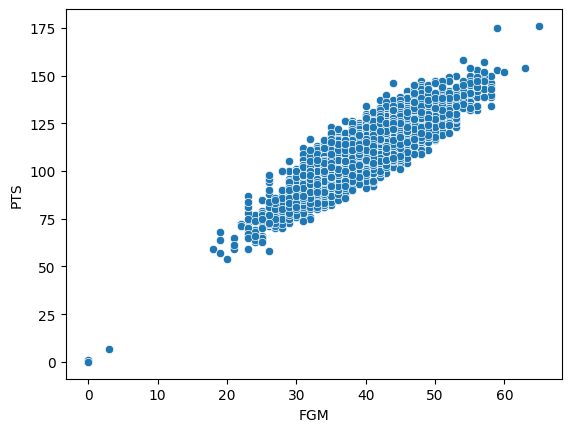

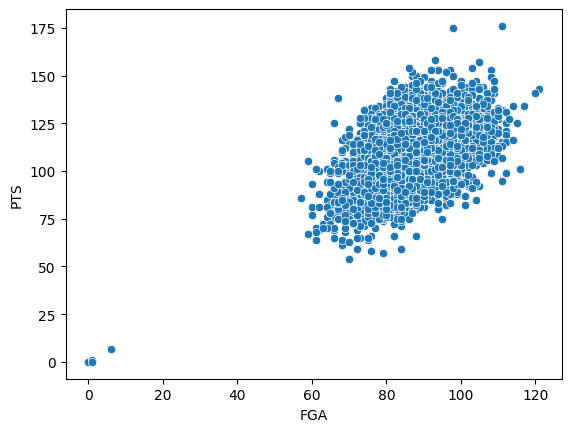

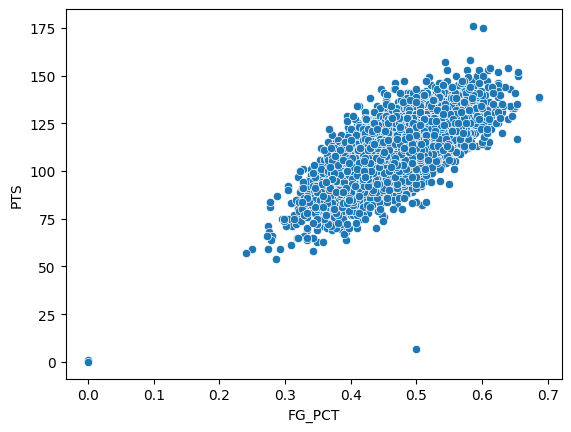

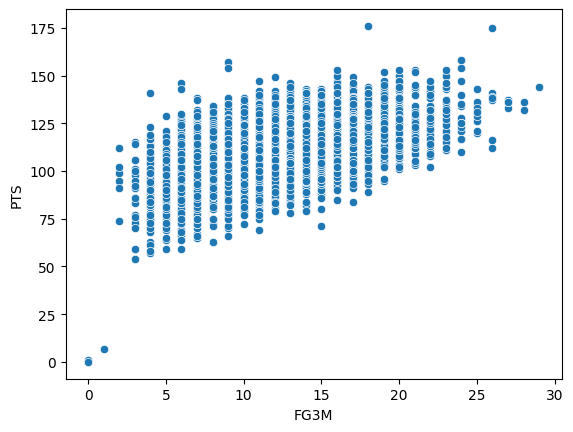

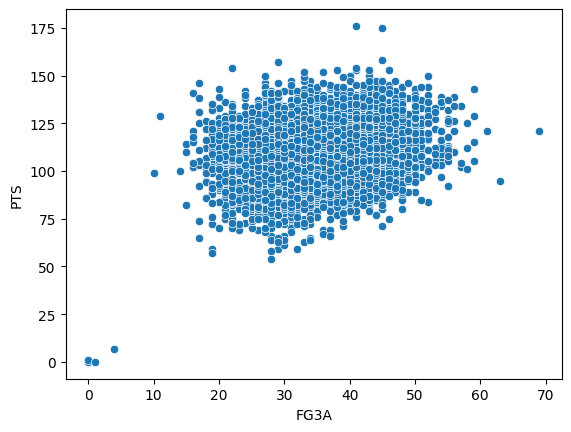

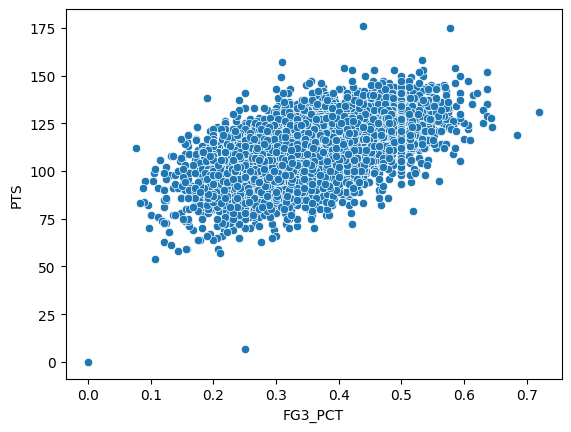

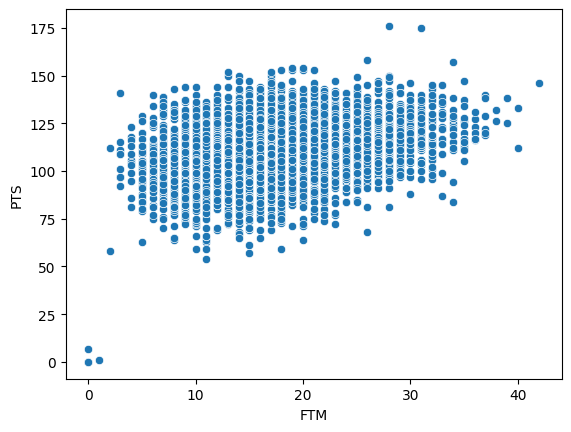

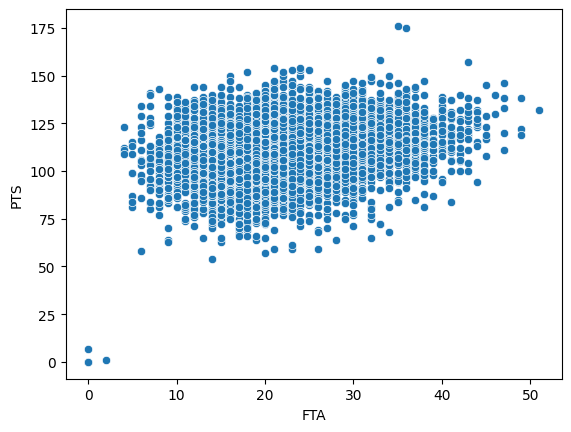

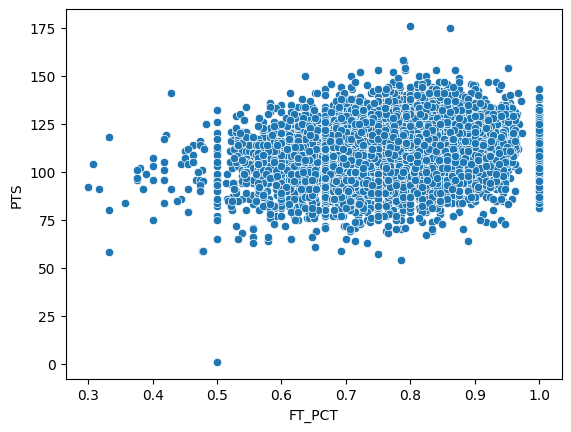

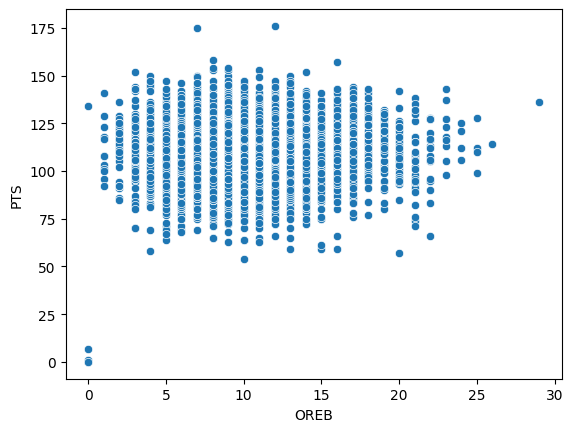

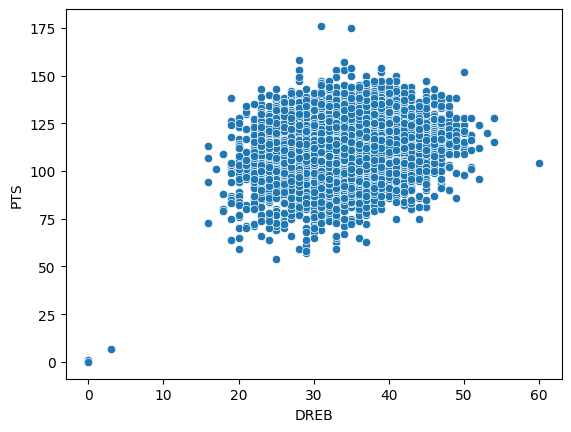

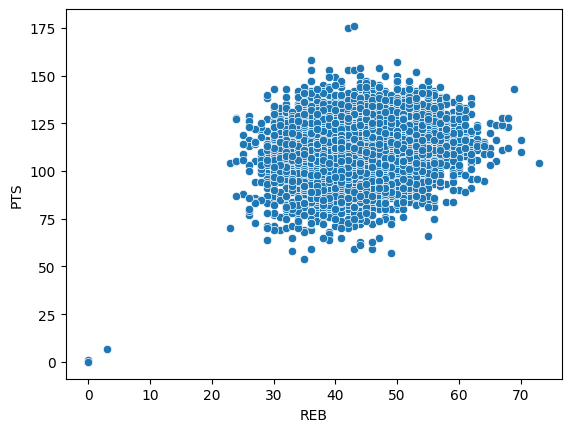

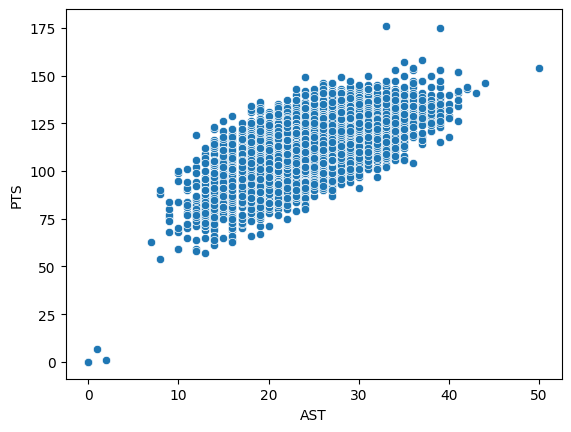

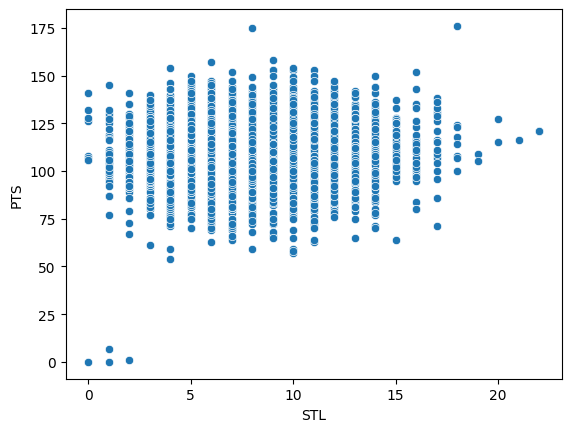

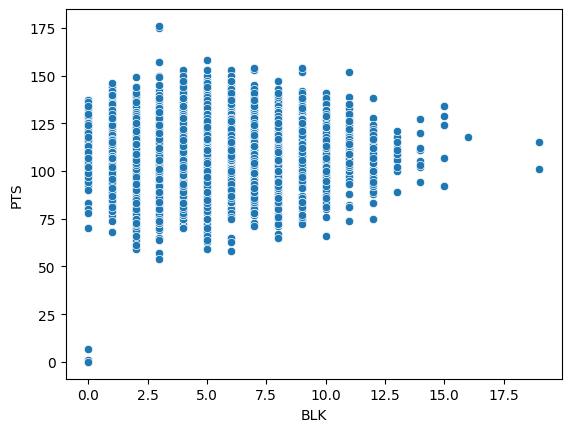

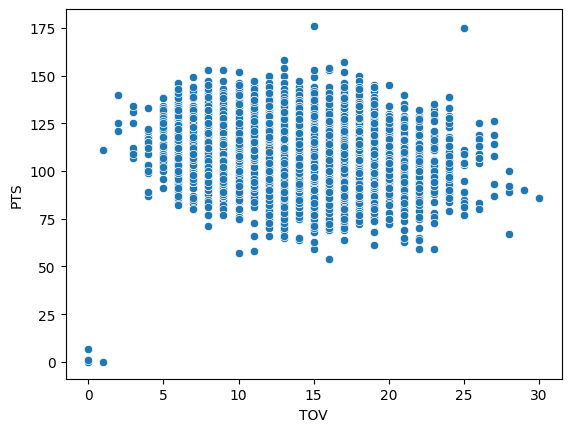

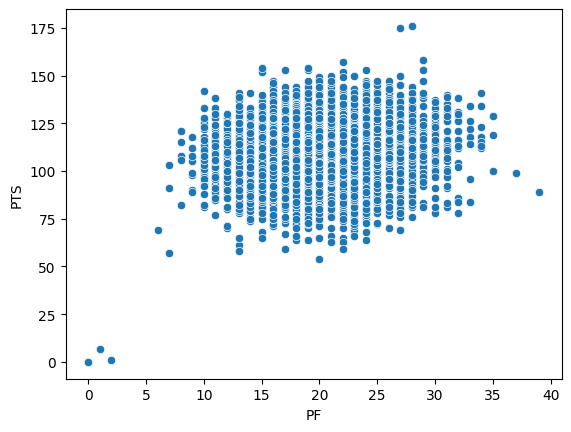

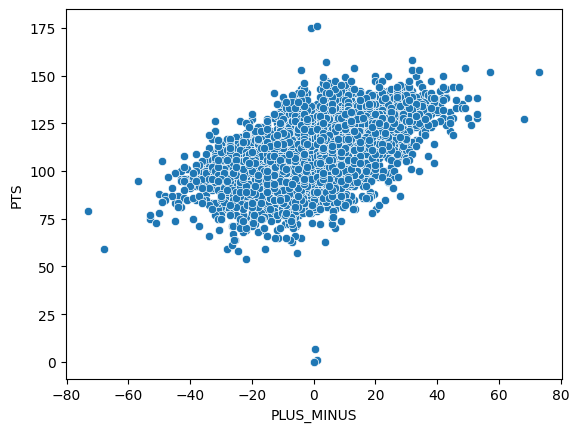

In [25]:
for i in range(len(features)-1):
    plt.figure()
    sns.scatterplot(x=games[features[i+1]], y=games[features[0]])

<Axes: >

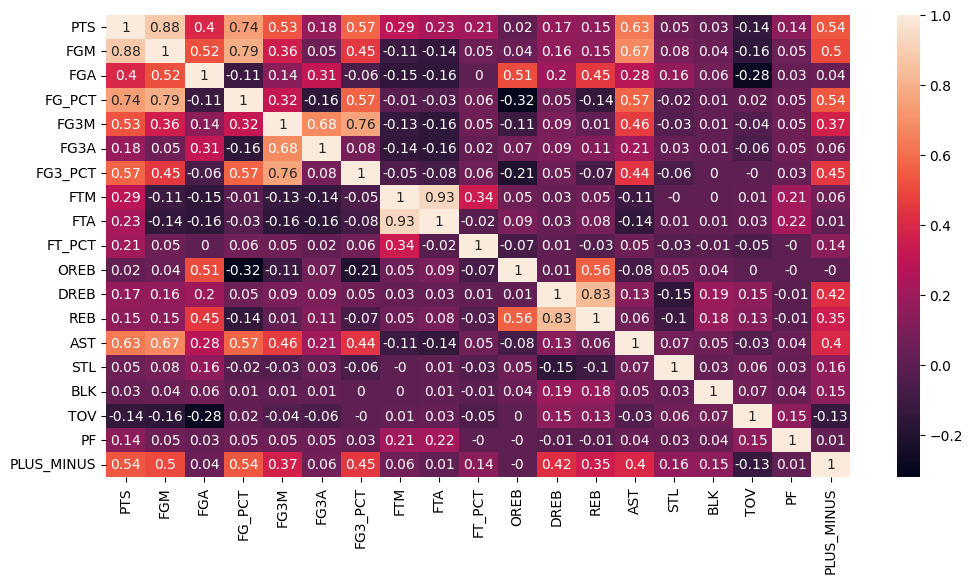

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(round(games[features].corr(),2), annot = True)

In [80]:
features = ['FGA', 'FG_PCT', 'FG3A', 'FG3_PCT', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

In [81]:
string = ''
for feature in features:
    if string == '':
        string += feature
    else:
        string += ' + ' + feature
string

'FGA + FG_PCT + FG3A + FG3_PCT + FTA + FT_PCT + OREB + DREB + REB + AST + STL + BLK + TOV + PF'

In [82]:
model = smf.ols(formula=f'PLUS_MINUS ~ {string}', data=games).fit()

In [83]:
model.params

Intercept    -93.335479
FGA           -0.759729
FG_PCT       133.115997
FG3A           0.272214
FG3_PCT       29.149052
FTA           -0.105542
FT_PCT        15.811775
OREB           0.524075
DREB           0.473319
REB            0.997394
AST            0.112237
STL            1.671769
BLK            0.386014
TOV           -1.349590
PF             0.207166
dtype: float64

In [84]:
model.rsquared

0.7104857220458527

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PLUS_MINUS   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:32:23   Log-Likelihood:                -27313.
No. Observations:                7807   AIC:                         5.465e+04
Df Residuals:                    7793   BIC:                         5.475e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -93.3355      1.957    -47.693      0.000     -97.172     -89.499
FGA           -0.7597      0.018    -41.202      0.000      -0.796      -0.724
FG_PCT       133.1160      2.470     53.888      0.000     128.274     137.958
FG3A           0.2722      0.015     18.386      0.000       0.243       0.301
FG3_PCT       29.1491      1.348     21.631      0.000      26.507      31.791
FTA           -0.1055      0.014     -7.446      0.000      -0.133      -0.078
FT_PCT        15.8118      0.890     17.757      0.000      14.066      17.557
OREB           0.5241      0.021     25.155      0.000       0.483       0.565
DREB           0.4733      0.015     32.501      0.000       0.445       0.502
REB            0.9974      0.013     75.988      0.000       0.972       1.023
AST            0.1122      0.025      4.456      0.000       0.063       0.162
STL            1.6718      0.033     51.145      0.000       1.608       1.736
BLK            0.3860      0.038     10.152      0.000       0.311       0.461
TOV           -1.3496      0.027    -50.461      0.000      -1.402      -1.297
PF             0.2072      0.023      8.987      0.000       0.162       0.252
==============================================================================
Omnibus:                       14.832   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.676
Skew:                           0.055   Prob(JB):                     0.000239
Kurtosis:                       3.198   Cond. No.                     1.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.6e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
game_ids = games['GAME_ID'].head(50).unique().tolist()

In [123]:
from nba_api.stats.endpoints import boxscorefourfactorsv2

In [124]:
boxscorefourfactors = None
for game_id in game_ids:
    if boxscorefourfactors is None:
        gamefinder = boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id=game_id)
        boxscorefourfactors = gamefinder.get_data_frames()[1]
    else:
        gamefinder = boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id=game_id)
        boxscorefourfactors = pd.concat([boxscorefourfactors, gamefinder.get_data_frames()[1]])

In [125]:
boxscorefourfactors = boxscorefourfactors.merge(games[['PLUS_MINUS', 'GAME_ID']], on='GAME_ID')
boxscorefourfactors = boxscorefourfactors.drop_duplicates(subset='GAME_ID')

In [126]:
boxscorefourfactors.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CITY',
       'MIN', 'EFG_PCT', 'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT', 'OPP_EFG_PCT',
       'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'PLUS_MINUS'],
      dtype='object')

In [127]:
features = ['EFG_PCT', 'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE', 'OPP_TOV_PCT', 'OPP_OREB_PCT']

In [128]:
string = ''
for feature in features:
    if string == '':
        string += feature
    else:
        string += ' + ' + feature
string

'EFG_PCT + FTA_RATE + TM_TOV_PCT + OREB_PCT + OPP_EFG_PCT + OPP_FTA_RATE + OPP_TOV_PCT + OPP_OREB_PCT'

In [129]:
model3 = smf.ols(formula=f'PLUS_MINUS ~ {string}', data=boxscorefourfactors).fit()

In [131]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PLUS_MINUS   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1.431
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.254
Time:                        18:54:57   Log-Likelihood:                -87.836
No. Observations:                  26   AIC:                             193.7
Df Residuals:                      17   BIC:                             205.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       56.7921     39.634      1.433      0.170     -26.828     140.413
EFG_PCT         30.9326     32.898      0.940      0.360     -38.477     100.342
FTA_RATE       -18.6124     30.734     -0.606      0.553     -83.455      46.230
TM_TOV_PCT      15.7741     77.988      0.202      0.842    -148.766     180.314
OREB_PCT        -6.8898     24.589     -0.280      0.783     -58.768      44.989
OPP_EFG_PCT   -118.6229     53.940     -2.199      0.042    -232.427      -4.819
OPP_FTA_RATE    48.4573     40.163      1.207      0.244     -36.279     133.194
OPP_TOV_PCT     80.5169     57.854      1.392      0.182     -41.545     202.578
OPP_OREB_PCT  -104.7543     43.496     -2.408      0.028    -196.522     -12.986
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.376
Skew:                           0.549   Prob(JB):                        0.503
Kurtosis:                       2.747   Cond. No.                         79.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_15466/2017669262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(boxscorefourfactors.corr(),2), annot = True)


<Axes: >

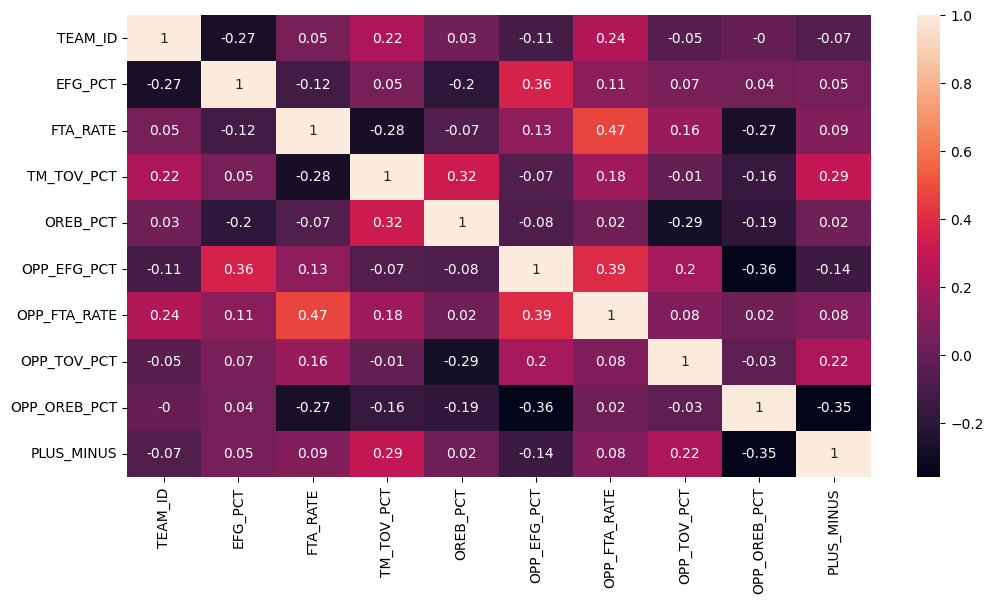

In [133]:
plt.figure(figsize=(12,6))
sns.heatmap(round(boxscorefourfactors.corr(),2), annot = True)

In [351]:
games_df = games[['TEAM_ID', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'PTS']].copy()

In [155]:
games_df['GAME_ID'] = games_df['GAME_ID'].astype('int32')

In [156]:
advanced = pd.read_pickle('../data/pkl/boxscores_advanced_team_part1.pkl')

In [157]:
columns_to_drop = ['TEAM_CITY', 'MIN', 'E_OFF_RATING', 'E_DEF_RATING', 
                   'E_NET_RATING', 'AST_RATIO', 'E_TM_TOV_PCT', 'USG_PCT', 
                   'E_USG_PCT', 'E_PACE', 'PACE_PER40', 'PIE']
advanced.drop(columns=columns_to_drop, inplace=True)

In [158]:
advanced['GAME_ID'] = advanced['GAME_ID'].astype('int32')

In [159]:
advanced = advanced.merge(games_df.drop(columns=['TEAM_ID']), on=['GAME_ID', 'TEAM_ABBREVIATION'])

In [199]:
features = ['OREB_PCT', 'PACE', 'POSS']

In [200]:
string = ''
for feature in features:
    if string == '':
        string += feature
    else:
        string += ' + ' + feature
string

'OREB_PCT + PACE + POSS'

In [201]:
model6 = smf.ols(formula=f'PTS ~ {string}', data=advanced).fit()

In [202]:
model6.rsquared

0.2848255900444203

In [203]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     649.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:08:51   Log-Likelihood:                -18890.
No. Observations:                4898   AIC:                         3.779e+04
Df Residuals:                    4894   BIC:                         3.781e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1877      3.707      2.748      0.006       2.921      17.455
OREB_PCT      32.7620      2.224     14.729      0.000      28.401      37.123
PACE          -0.5295      0.048    -11.003      0.000      -0.624      -0.435
POSS           1.4535      0.038     37.943      0.000       1.378       1.529
==============================================================================
Omnibus:                      178.940   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.569
Skew:                          -0.136   Prob(JB):                    8.88e-104
Kurtosis:                       4.500   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [448]:
df = pd.read_pickle('../data/pkl/alec_test_data.pkl')
elo_past = pd.read_csv('../data/csv/nba_elo.csv')
elo_current = pd.read_csv('../data/csv/nba_elo_latest.csv')

In [449]:
drop_columns = ['OFF_RATING_h', 'DEF_RATING_h', 'NET_RATING_h', 'AST_PCT_h', 'AST_TOV_h', 'OREB_PCT_h', 'DREB_PCT_h',
 'REB_PCT_h', 'TM_TOV_PCT_h', 'EFG_PCT_h', 'TS_PCT_h', 'PACE_h', 'POSS_h', 'OFF_RATING_a', 'DEF_RATING_a', 'NET_RATING_a',
 'AST_PCT_a', 'AST_TOV_a', 'OREB_PCT_a', 'DREB_PCT_a', 'REB_PCT_a', 'TM_TOV_PCT_a', 'EFG_PCT_a', 'TS_PCT_a', 'PACE_a', 'POSS_a']

In [450]:
today = datetime.now().strftime("%Y-/%m-/%d")

In [451]:
elo_past['date'] = pd.to_datetime(elo_past['date'])
elo_past= elo_past[elo_past['date'] > '2018-09-01']
elo_past[elo_past['date'] < today].tail(10)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
73052,2023-03-11,2023,0,NaN,MEM,DAL,1587.483303,1505.645086,0.740149,0.259851,...,NaN,1567.656915,1411.576912,0.790941,0.209059,112.0,108.0,45,22.0,34.0
73053,2023-03-11,2023,0,NaN,GSW,MIL,1536.351243,1667.347042,0.455511,0.544489,...,NaN,1575.571390,1604.897701,0.560120,0.439880,125.0,116.0,83,45.0,64.0
73054,2023-03-11,2023,0,NaN,NOP,OKC,1479.618742,1497.578678,0.615919,0.384081,...,NaN,1459.692020,1465.307846,0.603700,0.396300,96.0,110.0,35,66.0,51.0
73055,2023-03-11,2023,0,NaN,PHO,SAC,1589.740948,1551.297158,0.689321,0.310679,...,NaN,1564.722374,1529.638469,0.665446,0.334554,119.0,128.0,70,4.0,37.0
73056,2023-03-12,2023,0,NaN,DEN,BRK,1586.097336,1531.643587,0.708706,0.291294,...,NaN,1621.522954,1499.247066,0.798271,0.201729,120.0,122.0,73,5.0,39.0
73057,2023-03-12,2023,0,NaN,CHO,CLE,1408.213847,1608.762211,0.359208,0.640792,...,NaN,1347.722709,1588.069507,0.234569,0.765431,108.0,114.0,33,0.0,17.0
73058,2023-03-12,2023,0,NaN,PHI,WAS,1637.373508,1494.202469,0.802153,0.197847,...,NaN,1639.227348,1515.820119,0.754362,0.245638,112.0,93.0,79,14.0,47.0
73059,2023-03-12,2023,0,NaN,SAS,OKC,1290.060013,1514.535064,0.328156,0.671844,...,NaN,1232.515467,1419.700548,0.412371,0.587629,90.0,102.0,2,8.0,5.0
73060,2023-03-12,2023,0,NaN,NOP,POR,1462.662356,1419.428598,0.695195,0.304805,...,NaN,1464.257128,1393.546812,0.642410,0.357590,127.0,110.0,23,68.0,46.0
73061,2023-03-12,2023,0,NaN,LAL,NYK,1521.701847,1582.076804,0.556779,0.443221,...,NaN,1504.689165,1570.913806,0.575324,0.424676,108.0,112.0,66,53.0,60.0


In [452]:
elo_past['team1'].sort_values().unique()

array(['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [453]:
advanced['TEAM_ABBREVIATION'].sort_values().unique()

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [454]:
map = {'BRK': 'BKN', 'CHO': 'CHA', 'PHO': 'PHX'}
elo_past = elo_past.replace({'team1': map, 'team2': map})

In [455]:
elo_past = elo_past[['date', 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'raptor1_pre', 'raptor2_pre']]

In [456]:
df.drop(columns=drop_columns, inplace=True)

In [457]:
df = df.merge(elo_past, left_on=['GAME_DATE', 'TEAM_ABBREVIATION_h'], right_on=['date', 'team1'])

In [458]:
df.drop(columns=['date', 'team1', 'team2'], inplace=True)

In [459]:
df.rename(columns={'elo1_pre': 'elo_h', 'elo2_pre': 'elo_a', 'raptor1_pre': 'raptor_h', 'raptor2_pre': 'raptor_a'}, 
          inplace=True)

In [460]:
X_features = [col for col in df.columns if 'GAME_ID' not in col
                     and 'GAME_DATE' not in col
                     and 'TEAM_ID' not in col
                     and 'TEAM_NAME' not in col
                     and 'TEAM_ABBREVIATION' not in col
                     and 'PLUS_MINUS' not in col
                     and 'HOME_TEAM' not in col]

In [461]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [486]:
X_train, X_test, y_train, y_test = train_test_split(df[X_features], df['PLUS_MINUS'], test_size=.3)

In [498]:
bst = XGBRegressor(n_estimators=600, max_depth=32, 
                   learning_rate=.05,
                   eval_metric = "mae",
                   objective='reg:pseudohubererror')

In [499]:
bst.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=32, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=600, n_jobs=None, num_parallel_tree=None,
             objective='reg:pseudohubererror', predictor=None, ...)

In [500]:
cross_val_score(bst, X_train, y_train, cv=5).mean()

0.09557074897649369

In [490]:
preds = bst.predict(X_test)

<Axes: xlabel='PLUS_MINUS', ylabel='Count'>

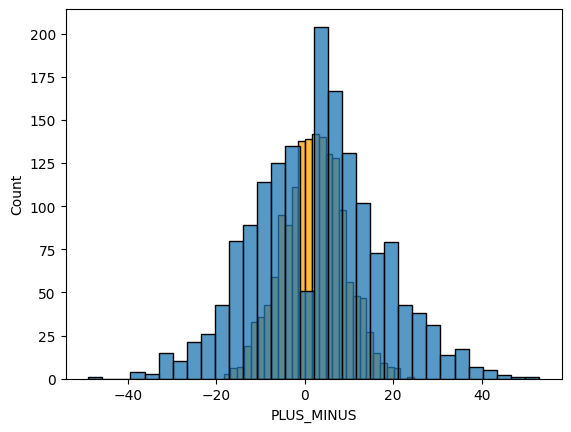

In [491]:
sns.histplot(preds, color='orange')
sns.histplot(y_test)

In [492]:
X_test['y_pred'] = preds

In [493]:
X_test['plus_minus'] = y_test

In [494]:
X_test

,OFF_RATING_Roll_mean_h,DEF_RATING_Roll_mean_h,NET_RATING_Roll_mean_h,AST_PCT_Roll_mean_h,AST_TOV_Roll_mean_h,OREB_PCT_Roll_mean_h,DREB_PCT_Roll_mean_h,REB_PCT_Roll_mean_h,TM_TOV_PCT_Roll_mean_h,EFG_PCT_Roll_mean_h,...,SAS_a,TOR_a,UTA_a,WAS_a,elo_h,elo_a,raptor_h,raptor_a,y_pred,plus_minus
2202,114.925,124.725,-9.825,0.45900,1.5450,0.25500,0.74975,0.50300,13.025,0.56625,...,0.0,0.0,0.0,0.0,1672.445462,1655.567671,1682.566133,1636.029562,8.433151,-8.0
1930,114.600,108.225,6.350,0.69025,2.6200,0.30425,0.78575,0.52250,12.100,0.51700,...,0.0,0.0,0.0,0.0,1452.726031,1514.031020,1447.899508,1541.624875,-3.322778,-32.0
3792,114.400,114.150,0.225,0.63500,2.0325,0.22525,0.73875,0.49775,13.450,0.54900,...,0.0,0.0,0.0,0.0,1590.404613,1607.202535,1461.569665,1519.312761,3.258574,-8.0
5323,115.450,110.400,5.025,0.59275,1.5900,0.32225,0.68650,0.50575,14.900,0.55675,...,0.0,0.0,0.0,0.0,1488.400819,1594.144540,1434.356543,1512.472640,2.284369,4.0
3893,118.225,100.850,17.400,0.50050,1.8775,0.25200,0.75425,0.52225,12.550,0.56700,...,0.0,0.0,0.0,0.0,1671.191724,1340.654395,1544.860856,1332.030993,6.967461,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,115.275,108.900,6.400,0.64275,2.1800,0.34350,0.76025,0.54750,13.025,0.50900,...,0.0,0.0,1.0,0.0,1574.509325,1571.989004,1569.644361,1535.535567,5.169056,-4.0
561,116.550,113.675,2.875,0.61600,1.5400,0.27000,0.63550,0.46625,16.750,0.58200,...,0.0,0.0,0.0,0.0,1565.406578,1525.075289,1616.857805,1516.867363,7.532335,20.0
3943,109.750,112.800,-3.075,0.54800,1.7475,0.31175,0.69425,0.48900,13.475,0.50500,...,0.0,0.0,0.0,0.0,1591.568572,1395.922220,1617.948033,1408.627175,10.054394,8.0
1061,105.475,107.500,-2.000,0.68625,1.6850,0.22025,0.71100,0.48500,16.475,0.54450,...,0.0,0.0,0.0,0.0,1577.879796,1403.153885,1560.706760,1254.575279,13.026873,16.0


<Axes: ylabel='PLUS_MINUS'>

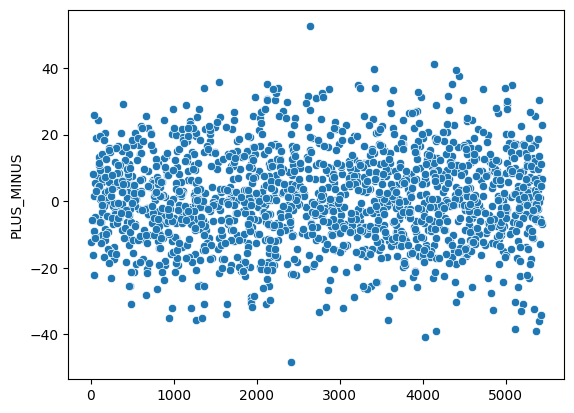

In [495]:
sns.scatterplot(y_test-preds)

In [7]:
games.to_csv('raw_games.csv')

In [58]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102157 entries, 0 to 2862
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEASON_ID          102157 non-null  object 
 1   TEAM_ID            102157 non-null  int64  
 2   TEAM_ABBREVIATION  102157 non-null  object 
 3   TEAM_NAME          102157 non-null  object 
 4   GAME_ID            102157 non-null  object 
 5   GAME_DATE          102157 non-null  object 
 6   MATCHUP            102157 non-null  object 
 7   WL                 102135 non-null  object 
 8   MIN                102157 non-null  int64  
 9   PTS                102157 non-null  int64  
 10  FGM                102157 non-null  int64  
 11  FGA                102157 non-null  int64  
 12  FG_PCT             102150 non-null  float64
 13  FG3M               102157 non-null  int64  
 14  FG3A               102155 non-null  float64
 15  FG3_PCT            101112 non-null  float64
 16  FTM 

In [59]:
games.sort_values(by='GAME_DATE', ascending=False)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612738,BOS,Boston Celtics,0022200969,2023-03-05,BOS vs. NYK,L,289,129,...,0.880,17.0,37.0,54.0,27,8.0,5,16,28,-2.0
0,22022,1610612746,LAC,LA Clippers,0022200970,2023-03-05,LAC vs. MEM,W,239,135,...,0.943,13.0,40.0,53.0,25,6.0,2,17,17,6.0
0,22022,1610612762,UTA,Utah Jazz,0022200968,2023-03-05,UTA @ OKC,L,240,119,...,0.815,12.0,27.0,39.0,30,5.0,8,16,25,-10.0
0,22022,1610612760,OKC,Oklahoma City Thunder,0022200968,2023-03-05,OKC vs. UTA,W,241,129,...,0.818,11.0,31.0,42.0,24,9.0,4,12,20,10.0
0,22022,1610612759,SAS,San Antonio Spurs,0022200967,2023-03-05,SAS @ HOU,L,240,110,...,0.619,13.0,22.0,35.0,23,5.0,4,15,20,-32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,21983,1610612754,IND,Indiana Pacers,0028300001,1983-10-28,IND @ MIL,L,240,83,...,0.619,24.0,29.0,53.0,27,7.0,4,19,22,NaN
3482,21983,1610612764,WAS,Washington Bullets,0028300003,1983-10-28,WAS @ PHL,L,240,114,...,0.759,10.0,26.0,36.0,32,9.0,3,21,35,NaN
3623,21983,1610612760,SEA,Seattle SuperSonics,0028300004,1983-10-28,SEA vs. GOS,L,240,109,...,0.698,8.0,23.0,31.0,27,4.0,3,22,34,NaN
3823,21983,1610612747,LAL,Los Angeles Lakers,0028300002,1983-10-28,LAL @ KCK,W,240,117,...,0.760,9.0,29.0,38.0,22,6.0,5,17,16,NaN


In [60]:
games.groupby('TEAM_ID').apply(lambda x: x)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612737,ATL,Atlanta Hawks,0022200958,2023-03-04,ATL @ MIA,L,239,109,...,0.867,10.0,27.0,37.0,22,12.0,1,16,23,-8.0
1,22022,1610612737,ATL,Atlanta Hawks,0022200947,2023-03-03,ATL vs. POR,W,239,129,...,0.813,10.0,33.0,43.0,30,10.0,5,17,19,18.0
2,22022,1610612737,ATL,Atlanta Hawks,0022200923,2023-02-28,ATL vs. WAS,L,239,116,...,0.895,13.0,29.0,42.0,21,4.0,7,9,17,-3.0
3,22022,1610612737,ATL,Atlanta Hawks,0022200911,2023-02-26,ATL vs. BKN,W,240,129,...,0.821,13.0,33.0,46.0,20,7.0,2,15,18,2.0
4,22022,1610612737,ATL,Atlanta Hawks,0022200896,2023-02-24,ATL vs. CLE,W,240,136,...,0.913,5.0,37.0,42.0,28,7.0,8,14,21,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,21988,1610612766,CHH,Charlotte Hornets,0028800062,1988-11-12,CHH @ ATL,L,238,111,...,0.813,14.0,21.0,35.0,30,12.0,2,19,26,NaN
2859,21988,1610612766,CHH,Charlotte Hornets,0028800052,1988-11-11,CHH @ WAS,L,240,87,...,0.760,11.0,32.0,43.0,22,9.0,1,23,26,NaN
2860,21988,1610612766,CHH,Charlotte Hornets,0028800024,1988-11-08,CHH vs. LAC,W,240,117,...,0.738,17.0,38.0,55.0,28,9.0,1,17,31,NaN
2861,21988,1610612766,CHH,Charlotte Hornets,0028800015,1988-11-05,CHH @ DET,L,240,85,...,1.000,21.0,19.0,40.0,18,8.0,6,11,21,NaN


In [61]:
games['TEAM_NAME'].unique()

array(['Atlanta Hawks', 'Boston Celtics', 'Cleveland Cavaliers',
       'New Orleans Pelicans', 'New Orleans Hornets',
       'New Orleans/Oklahoma City Hornets', 'Chicago Bulls',
       'Dallas Mavericks', 'Denver Nuggets', 'Golden State Warriors',
       'Houston Rockets', 'LA Clippers', 'Los Angeles Clippers',
       'San Diego Clippers', 'Los Angeles Lakers', 'Miami Heat',
       'Milwaukee Bucks', 'Minnesota Timberwolves', 'Brooklyn Nets',
       'New Jersey Nets', 'New York Knicks', 'Orlando Magic',
       'Indiana Pacers', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'Kansas City Kings',
       'San Antonio Spurs', 'Oklahoma City Thunder',
       'Seattle SuperSonics', 'Toronto Raptors', 'Utah Jazz',
       'Memphis Grizzlies', 'Vancouver Grizzlies', 'Washington Wizards',
       'Washington Bullets', 'Detroit Pistons', 'Charlotte Hornets',
       'Charlotte Bobcats'], dtype=object)

In [10]:
game_ids = games['GAME_ID'].head(10).unique().tolist()

In [11]:
from nba_api.stats.endpoints import boxscoreadvancedv2

In [12]:
boxscores_advanced = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_ids[0])

The command above/below gets the advanced boxscore from a given game id

boxscores_advanced.get_data_frames()[0] returns the advanced boxscore broken up per player

boxscores_advanced.get_data_frames()[1] returns the advanced boxscore broken up per team

In [13]:
boxscores_advanced.get_data_frames()[1]

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0022200974,1610612748,Heat,MIA,Miami,None,None,0.0,None,0.0,...,None,None,None,1.0,0.0,None,None,None,0,None
1,0022200974,1610612737,Hawks,ATL,Atlanta,None,None,0.0,None,0.0,...,None,None,None,1.0,0.0,None,None,None,0,None


In [14]:
boxscores_advanced = None
for game_id in game_ids:
    if boxscores_advanced is None:
        gamefinder = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_id)
        boxscores_advanced = gamefinder.get_data_frames()[1]
    else:
        gamefinder = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_id)
        boxscores_advanced = pd.concat([boxscores_advanced, gamefinder.get_data_frames()[1]])

In [15]:
boxscores_advanced

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,...,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0022200974,1610612748,Heat,MIA,Miami,None,None,0.0,None,0.0,...,None,None,None,1.0,0.000,None,None,None,0,None
1,0022200974,1610612737,Hawks,ATL,Atlanta,None,None,0.0,None,0.0,...,None,None,None,1.0,0.000,None,None,None,0,None
0,0022200958,1610612748,Heat,MIA,Miami,240:00,115.7,117.0,111.0,110.1,...,20.0,0.584,0.628,1.0,0.196,99.66,99.5,82.92,100,0.545
1,0022200958,1610612737,Hawks,ATL,Atlanta,240:00,111.0,110.1,115.7,117.0,...,16.2,0.525,0.591,1.0,0.201,99.66,99.5,82.92,99,0.455
0,0022200947,1610612757,Trail Blazers,POR,Portland,240:00,105.9,107.8,122.8,125.2,...,17.5,0.546,0.579,1.0,0.199,104.92,103.0,85.83,103,0.417
1,0022200947,1610612737,Hawks,ATL,Atlanta,240:00,122.8,125.2,105.9,107.8,...,16.5,0.637,0.658,1.0,0.202,104.92,103.0,85.83,103,0.583
0,0022200923,1610612764,Wizards,WAS,Washington,240:00,120.4,125.3,119.1,119.6,...,9.5,0.526,0.562,1.0,0.199,98.08,96.0,80.0,95,0.52
1,0022200923,1610612737,Hawks,ATL,Atlanta,240:00,119.1,119.6,120.4,125.3,...,9.3,0.532,0.572,1.0,0.199,98.08,96.0,80.0,97,0.48
0,0022200911,1610612751,Nets,BKN,Brooklyn,240:00,122.4,121.0,122.5,125.2,...,9.5,0.575,0.637,1.0,0.199,104.54,104.0,86.67,105,0.514
1,0022200911,1610612737,Hawks,ATL,Atlanta,240:00,122.5,125.2,122.4,121.0,...,15.5,0.589,0.63,1.0,0.199,104.54,104.0,86.67,103,0.486


In [16]:
from nba_api.stats.endpoints import boxscoreplayertrackv2

In [17]:
boxscores = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=game_ids[0])

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

In [71]:
boxscores.get_data_frames()[0]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,...,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
0,0022200958,1610612737,ATL,Atlanta,1629631,De'Andre Hunter,F,,30:18,4.00,...,2,3,0.667,4,7,0.571,0.599,1,1,1.000
1,0022200958,1610612737,ATL,Atlanta,1628381,John Collins,F,,16:13,4.15,...,0,1,0.000,1,3,0.333,0.250,0,2,0.000
2,0022200958,1610612737,ATL,Atlanta,203991,Clint Capela,C,,24:56,3.95,...,7,9,0.778,1,1,1.000,0.800,2,7,0.286
3,0022200958,1610612737,ATL,Atlanta,1627749,Dejounte Murray,G,,36:02,4.14,...,2,6,0.333,1,8,0.125,0.213,3,3,1.000
4,0022200958,1610612737,ATL,Atlanta,1629027,Trae Young,G,,32:17,3.92,...,1,4,0.250,1,9,0.111,0.153,0,0,0.000
5,0022200958,1610612737,ATL,Atlanta,203992,Bogdan Bogdanovic,,,26:06,4.19,...,2,3,0.667,2,6,0.333,0.444,3,3,1.000
6,0022200958,1610612737,ATL,Atlanta,1630180,Saddiq Bey,,,34:48,4.18,...,2,3,0.667,5,9,0.556,0.582,2,3,0.667
7,0022200958,1610612737,ATL,Atlanta,1630168,Onyeka Okongwu,,,23:04,4.27,...,3,4,0.750,1,1,1.000,0.800,4,5,0.800
8,0022200958,1610612737,ATL,Atlanta,1630552,Jalen Johnson,,,16:16,4.13,...,0,0,0.000,2,2,1.000,1.000,0,0,0.000
9,0022200958,1610612737,ATL,Atlanta,1628981,Bruno Fernando,,DNP - Coach's Decision,0:00,0.00,...,0,0,0.000,0,0,0.000,0.000,0,0,0.000


In [72]:
boxscores_advanced = None
for game_id in game_ids:
    if boxscores_advanced is None:
        gamefinder = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=game_id)
        boxscores_advanced = gamefinder.get_data_frames()[0]
    else:
        gamefinder = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=game_id)
        boxscores_advanced = pd.concat([boxscores_advanced, gamefinder.get_data_frames()[0]])

In [74]:
boxscores_advanced

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,...,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
0,0022200958,1610612737,ATL,Atlanta,1629631,De'Andre Hunter,F,,30:18,4.00,...,2,3,0.667,4,7,0.571,0.599,1,1,1.000
1,0022200958,1610612737,ATL,Atlanta,1628381,John Collins,F,,16:13,4.15,...,0,1,0.000,1,3,0.333,0.250,0,2,0.000
2,0022200958,1610612737,ATL,Atlanta,203991,Clint Capela,C,,24:56,3.95,...,7,9,0.778,1,1,1.000,0.800,2,7,0.286
3,0022200958,1610612737,ATL,Atlanta,1627749,Dejounte Murray,G,,36:02,4.14,...,2,6,0.333,1,8,0.125,0.213,3,3,1.000
4,0022200958,1610612737,ATL,Atlanta,1629027,Trae Young,G,,32:17,3.92,...,1,4,0.250,1,9,0.111,0.153,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0022100968,1610612765,DET,Detroit,203482,Kelly Olynyk,,,17:29,3.99,...,3,4,0.750,0,0,0.000,0.750,1,1,1.000
22,0022100968,1610612765,DET,Detroit,203585,Rodney McGruder,,,13:48,4.28,...,0,1,0.000,0,2,0.000,0.000,1,1,1.000
23,0022100968,1610612765,DET,Detroit,1630587,Isaiah Livers,,,24:33,4.16,...,0,0,0.000,3,6,0.500,0.500,1,1,1.000
24,0022100968,1610612765,DET,Detroit,1628977,Hamidou Diallo,,DNP - Coach's Decision,0:00,0.00,...,0,0,0.000,0,0,0.000,0.000,0,0,0.000
